In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('../dataset/model_data.csv')

In [4]:
df.shape

(27993, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27993 entries, 0 to 27992
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   resistance(ohm)                 27993 non-null  float64
 1   motor_torque(N-m)               27993 non-null  float64
 2   blades_angle(°)                 27993 non-null  float64
 3   rotor_torque(N-m)               27993 non-null  float64
 4   wind_speed(m/s)                 27993 non-null  float64
 5   atmospheric_pressure(Pascal)    27993 non-null  float64
 6   gearbox_temperature(°C)         27993 non-null  float64
 7   engine_temperature(°C)          27993 non-null  float64
 8   wind_direction(°)               27993 non-null  float64
 9   shaft_temperature(°C)           27993 non-null  float64
 10  area_temperature(°C)            27993 non-null  float64
 11  blade_breadth(m)                27993 non-null  float64
 12  windmill_generated_power(kW/h)  

In [6]:
X = df.drop(['windmill_generated_power(kW/h)'],axis=1)
y = df['windmill_generated_power(kW/h)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=12)

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score

#### I am going to use default parameters for CatBoost. For XGBoost and RandomForest, I have used parameters obtained after hypertuning.

In [10]:
cat = CatBoostRegressor()

In [11]:
cat.fit(X_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067102
0:	learn: 2.5630311	total: 173ms	remaining: 2m 53s
1:	learn: 2.4477055	total: 186ms	remaining: 1m 33s
2:	learn: 2.3421709	total: 198ms	remaining: 1m 5s
3:	learn: 2.2385672	total: 209ms	remaining: 52s
4:	learn: 2.1326318	total: 219ms	remaining: 43.6s
5:	learn: 2.0304172	total: 228ms	remaining: 37.7s
6:	learn: 1.9355496	total: 236ms	remaining: 33.5s
7:	learn: 1.8605382	total: 244ms	remaining: 30.2s
8:	learn: 1.7763711	total: 252ms	remaining: 27.7s
9:	learn: 1.6964861	total: 260ms	remaining: 25.7s
10:	learn: 1.6380969	total: 268ms	remaining: 24.1s
11:	learn: 1.5830708	total: 287ms	remaining: 23.6s
12:	learn: 1.5285690	total: 295ms	remaining: 22.4s
13:	learn: 1.4655774	total: 303ms	remaining: 21.3s
14:	learn: 1.4160643	total: 312ms	remaining: 20.5s
15:	learn: 1.3753281	total: 320ms	remaining: 19.7s
16:	learn: 1.3209400	total: 328ms	remaining: 19s
17:	learn: 1.2701438	total: 336ms	remaining: 18.3s
18:	learn: 1.2267056	total: 344ms	remaining: 17.8s
19:	learn: 1.

173:	learn: 0.5693218	total: 1.91s	remaining: 9.04s
174:	learn: 0.5687982	total: 1.92s	remaining: 9.05s
175:	learn: 0.5684763	total: 1.93s	remaining: 9.03s
176:	learn: 0.5681948	total: 1.94s	remaining: 9.01s
177:	learn: 0.5675040	total: 1.95s	remaining: 9s
178:	learn: 0.5671030	total: 1.97s	remaining: 9.04s
179:	learn: 0.5663250	total: 1.98s	remaining: 9.03s
180:	learn: 0.5655010	total: 1.99s	remaining: 9.02s
181:	learn: 0.5652393	total: 2s	remaining: 9s
182:	learn: 0.5647358	total: 2.01s	remaining: 8.98s
183:	learn: 0.5640977	total: 2.02s	remaining: 8.97s
184:	learn: 0.5631953	total: 2.04s	remaining: 8.97s
185:	learn: 0.5626415	total: 2.05s	remaining: 8.96s
186:	learn: 0.5620231	total: 2.06s	remaining: 8.96s
187:	learn: 0.5613695	total: 2.07s	remaining: 8.95s
188:	learn: 0.5606413	total: 2.08s	remaining: 8.94s
189:	learn: 0.5597739	total: 2.09s	remaining: 8.92s
190:	learn: 0.5592146	total: 2.1s	remaining: 8.9s
191:	learn: 0.5585855	total: 2.11s	remaining: 8.87s
192:	learn: 0.5579183	t

332:	learn: 0.5022921	total: 3.62s	remaining: 7.25s
333:	learn: 0.5018101	total: 3.63s	remaining: 7.24s
334:	learn: 0.5016364	total: 3.64s	remaining: 7.23s
335:	learn: 0.5014544	total: 3.65s	remaining: 7.22s
336:	learn: 0.5012087	total: 3.66s	remaining: 7.21s
337:	learn: 0.5008634	total: 3.67s	remaining: 7.2s
338:	learn: 0.5005049	total: 3.69s	remaining: 7.19s
339:	learn: 0.5002926	total: 3.7s	remaining: 7.18s
340:	learn: 0.4999949	total: 3.71s	remaining: 7.17s
341:	learn: 0.4996908	total: 3.72s	remaining: 7.16s
342:	learn: 0.4994552	total: 3.73s	remaining: 7.14s
343:	learn: 0.4990027	total: 3.74s	remaining: 7.13s
344:	learn: 0.4984923	total: 3.75s	remaining: 7.12s
345:	learn: 0.4983878	total: 3.76s	remaining: 7.11s
346:	learn: 0.4978701	total: 3.77s	remaining: 7.1s
347:	learn: 0.4974853	total: 3.79s	remaining: 7.09s
348:	learn: 0.4973010	total: 3.8s	remaining: 7.08s
349:	learn: 0.4971119	total: 3.81s	remaining: 7.08s
350:	learn: 0.4969413	total: 3.82s	remaining: 7.07s
351:	learn: 0.49

505:	learn: 0.4578483	total: 5.51s	remaining: 5.38s
506:	learn: 0.4576878	total: 5.52s	remaining: 5.37s
507:	learn: 0.4575781	total: 5.53s	remaining: 5.36s
508:	learn: 0.4573551	total: 5.54s	remaining: 5.34s
509:	learn: 0.4572691	total: 5.55s	remaining: 5.33s
510:	learn: 0.4572065	total: 5.55s	remaining: 5.31s
511:	learn: 0.4570824	total: 5.56s	remaining: 5.3s
512:	learn: 0.4568397	total: 5.57s	remaining: 5.29s
513:	learn: 0.4566935	total: 5.57s	remaining: 5.27s
514:	learn: 0.4564390	total: 5.58s	remaining: 5.25s
515:	learn: 0.4560357	total: 5.59s	remaining: 5.24s
516:	learn: 0.4558387	total: 5.59s	remaining: 5.23s
517:	learn: 0.4557451	total: 5.6s	remaining: 5.21s
518:	learn: 0.4555309	total: 5.61s	remaining: 5.2s
519:	learn: 0.4553169	total: 5.63s	remaining: 5.19s
520:	learn: 0.4551155	total: 5.64s	remaining: 5.18s
521:	learn: 0.4549808	total: 5.65s	remaining: 5.17s
522:	learn: 0.4545960	total: 5.66s	remaining: 5.16s
523:	learn: 0.4544648	total: 5.67s	remaining: 5.15s
524:	learn: 0.4

664:	learn: 0.4283767	total: 7.27s	remaining: 3.66s
665:	learn: 0.4281400	total: 7.28s	remaining: 3.65s
666:	learn: 0.4280260	total: 7.29s	remaining: 3.64s
667:	learn: 0.4278825	total: 7.3s	remaining: 3.63s
668:	learn: 0.4277864	total: 7.31s	remaining: 3.62s
669:	learn: 0.4277270	total: 7.32s	remaining: 3.6s
670:	learn: 0.4275990	total: 7.33s	remaining: 3.59s
671:	learn: 0.4273137	total: 7.34s	remaining: 3.58s
672:	learn: 0.4270583	total: 7.35s	remaining: 3.57s
673:	learn: 0.4269169	total: 7.36s	remaining: 3.56s
674:	learn: 0.4267894	total: 7.38s	remaining: 3.55s
675:	learn: 0.4266887	total: 7.39s	remaining: 3.54s
676:	learn: 0.4265938	total: 7.4s	remaining: 3.53s
677:	learn: 0.4264722	total: 7.41s	remaining: 3.52s
678:	learn: 0.4263569	total: 7.42s	remaining: 3.51s
679:	learn: 0.4262347	total: 7.43s	remaining: 3.5s
680:	learn: 0.4260802	total: 7.45s	remaining: 3.49s
681:	learn: 0.4257039	total: 7.46s	remaining: 3.48s
682:	learn: 0.4254547	total: 7.47s	remaining: 3.47s
683:	learn: 0.42

824:	learn: 0.4039149	total: 9.1s	remaining: 1.93s
825:	learn: 0.4038513	total: 9.11s	remaining: 1.92s
826:	learn: 0.4037160	total: 9.12s	remaining: 1.91s
827:	learn: 0.4035755	total: 9.13s	remaining: 1.9s
828:	learn: 0.4033633	total: 9.14s	remaining: 1.89s
829:	learn: 0.4032396	total: 9.15s	remaining: 1.88s
830:	learn: 0.4030878	total: 9.17s	remaining: 1.86s
831:	learn: 0.4029123	total: 9.21s	remaining: 1.86s
832:	learn: 0.4027600	total: 9.22s	remaining: 1.85s
833:	learn: 0.4026799	total: 9.23s	remaining: 1.84s
834:	learn: 0.4025019	total: 9.24s	remaining: 1.83s
835:	learn: 0.4023854	total: 9.26s	remaining: 1.81s
836:	learn: 0.4023132	total: 9.27s	remaining: 1.8s
837:	learn: 0.4021831	total: 9.28s	remaining: 1.79s
838:	learn: 0.4020028	total: 9.29s	remaining: 1.78s
839:	learn: 0.4018879	total: 9.3s	remaining: 1.77s
840:	learn: 0.4017776	total: 9.32s	remaining: 1.76s
841:	learn: 0.4017194	total: 9.33s	remaining: 1.75s
842:	learn: 0.4016138	total: 9.34s	remaining: 1.74s
843:	learn: 0.40

987:	learn: 0.3826566	total: 11s	remaining: 133ms
988:	learn: 0.3825484	total: 11s	remaining: 122ms
989:	learn: 0.3824398	total: 11s	remaining: 111ms
990:	learn: 0.3823634	total: 11s	remaining: 100ms
991:	learn: 0.3823138	total: 11s	remaining: 88.9ms
992:	learn: 0.3821608	total: 11s	remaining: 77.8ms
993:	learn: 0.3820848	total: 11.1s	remaining: 66.7ms
994:	learn: 0.3820130	total: 11.1s	remaining: 55.6ms
995:	learn: 0.3819432	total: 11.1s	remaining: 44.5ms
996:	learn: 0.3817146	total: 11.1s	remaining: 33.4ms
997:	learn: 0.3816059	total: 11.1s	remaining: 22.2ms
998:	learn: 0.3815000	total: 11.1s	remaining: 11.1ms
999:	learn: 0.3814296	total: 11.1s	remaining: 0us


In [12]:
rf = RandomForestRegressor(n_estimators=250, max_depth=25, min_samples_leaf=2)

In [13]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=250)

In [14]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6)

In [15]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Comparing the Model Performances

In [18]:
def model_score(models):
    for name, model in models.items():
        y_train_pred = model.predict(X_train)
        train_score = r2_score(y_train, y_train_pred)

        y_val_pred = model.predict(X_val)
        val_score = r2_score(y_val, y_val_pred)
        print(f'{name} R2 Score: Train Score: {round(train_score,2)}, Test Score {round(val_score,2)}')


In [38]:
def residual_analysis(models):
    
    plt.figure(figsize=(15,15))
    plt.suptitle('Residual Analysis Comparison',fontsize=18)
    
    c=1
    for name, model in models.items():
        y_train_pred = model.predict(X_train)

        y_val_pred = model.predict(X_val)
        
        train_res = y_train-y_train_pred
        val_res = y_val-y_val_pred

        plt.subplot(3,2,c)
        plt.title('Train Set')
        sb.distplot(train_res, label=name)
        plt.legend()

        plt.subplot(3,2,c+1)
        plt.title('Test Set')
        sb.distplot(val_res, label=name)
        plt.legend()
        
        c+=2
    plt.savefig('Residuals.png')
    plt.show()

In [35]:
def homoscedestic_test(model):
    
    plt.figure(figsize=(15,15))
    plt.suptitle('Homoscedestic Test Comparison',fontsize=18)
    
    c=1
    for name, model in models.items():
        y_train_pred = model.predict(X_train)

        y_val_pred = model.predict(X_val)

        plt.subplot(3,2,c)
        plt.title('Train Set')
        plt.xlabel('y_train')
        plt.ylabel('y_train_pred')
        plt.scatter(y_train,y_train_pred, label=name)
        plt.legend()

        plt.subplot(3,2,c+1)
        plt.title('Test Set')
        plt.xlabel('y_test')
        plt.ylabel('y_test_pred')
        plt.scatter(y_val,y_val_pred, label=name)
        plt.legend()
        
        c+=2
    plt.savefig('Homoscedestic.png')
    plt.show()

In [31]:
models = {'Random Forest':rf, 'XG Boost': xgb, 'CatBoost': cat}

In [32]:
model_score(models)

Random Forest R2 Score: Train Score: 0.99, Test Score 0.95
XG Boost R2 Score: Train Score: 0.99, Test Score 0.96
CatBoost R2 Score: Train Score: 0.98, Test Score 0.96


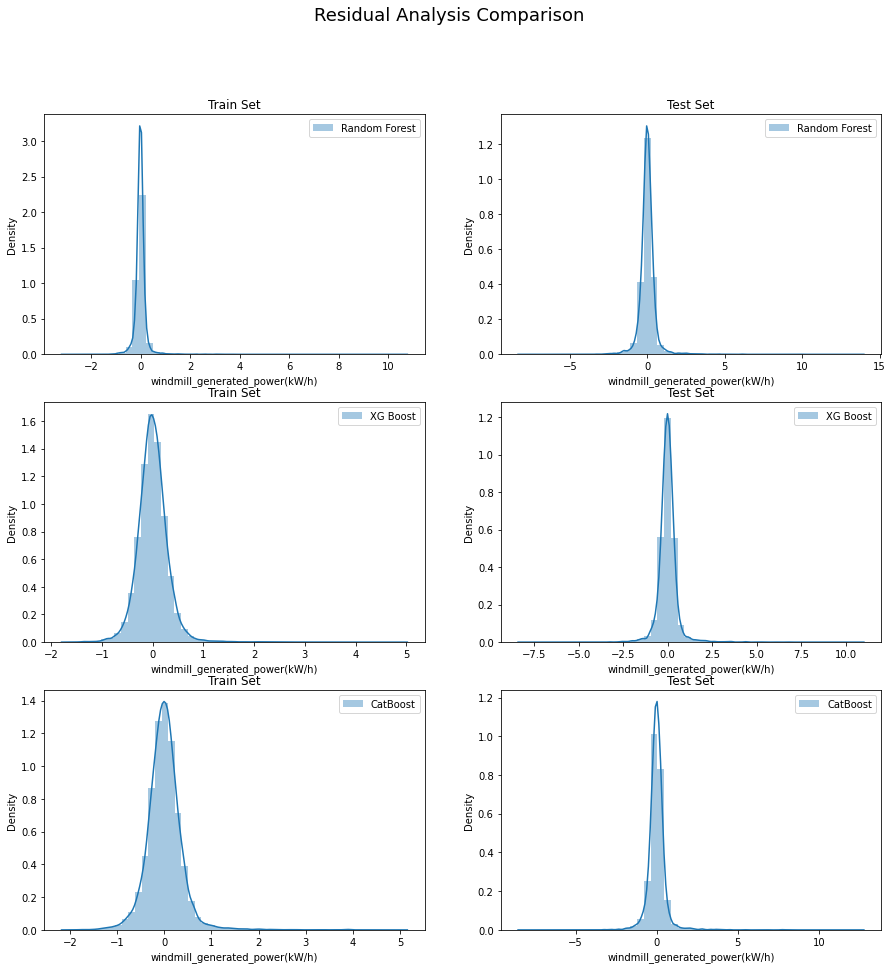

In [39]:
residual_analysis(models)

#### Random Forest's distribution of residuals was narrower compared to other model's residuals

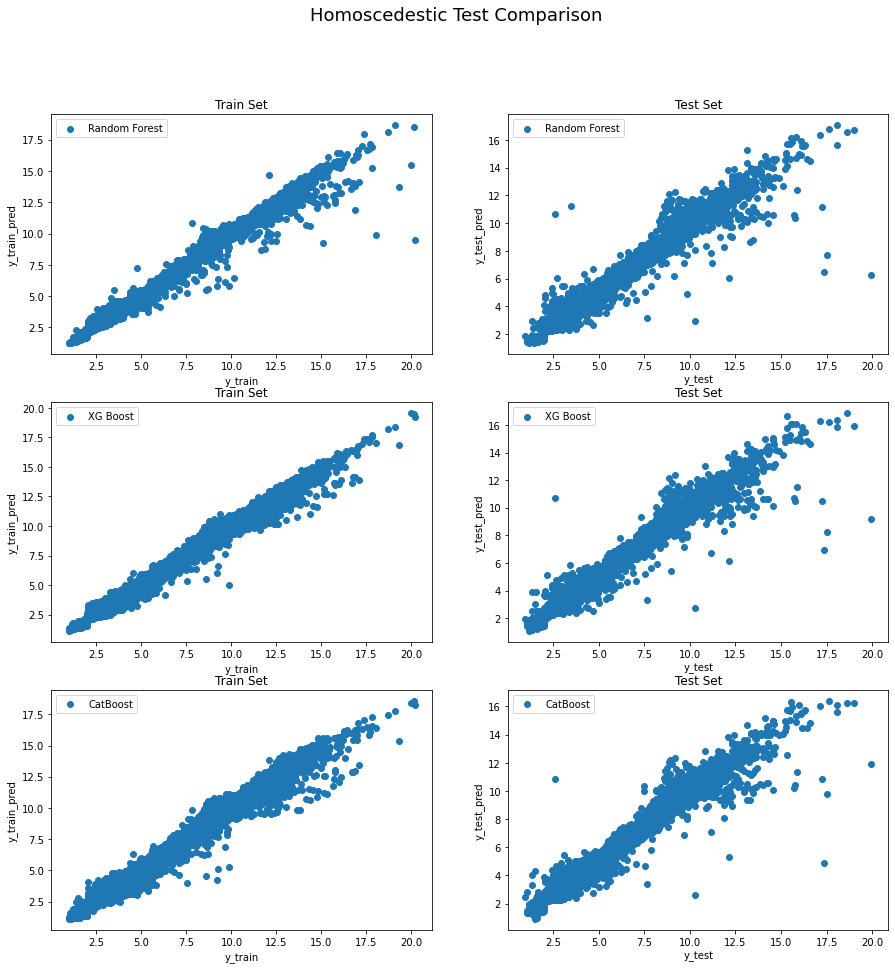

In [37]:
homoscedestic_test(models)

#### All the models gave similar performance for the test set, whereas for Random Forest on train set, had some noise towards the end.

#### However, Catboost was not hypertuned for the given data it gave similar performance as hypertuned XGBoost